In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

<AxesSubplot:>

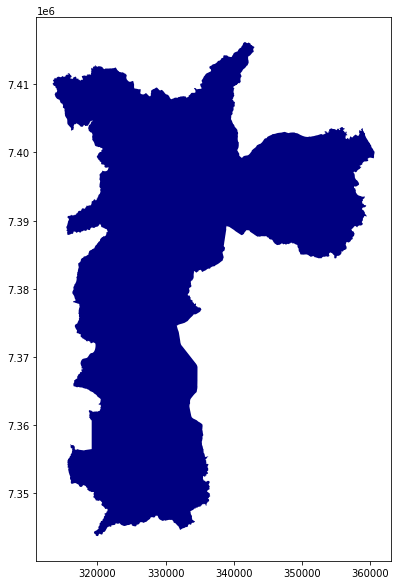

In [2]:
df_geo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/od2017/Municipios_2017_region.shp")
df_geo[df_geo["NomeMunici"] == "São Paulo"].plot(cmap="jet", column= "Area_ha", figsize=(10,10))

In [3]:
df_sp = df_geo[df_geo["NomeMunici"] == "São Paulo"]

Index(['NumeroZona', 'NomeZona', 'NumeroMuni', 'NomeMunici', 'NumDistrit',
       'NomeDistri', 'Area_ha_2', 'geometry'],
      dtype='object')


<AxesSubplot:>

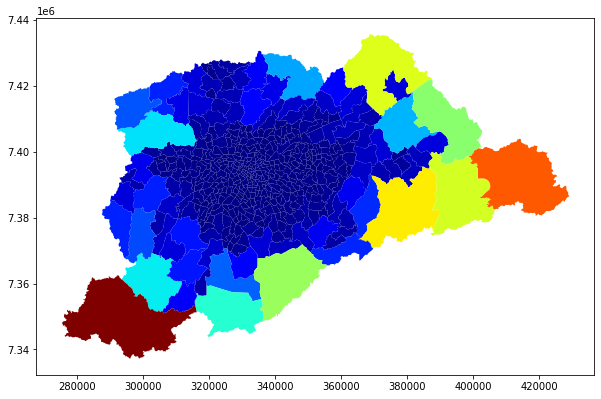

In [4]:
df_geo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/od2017/Zonas_2017_region.shp")
print(df_geo.columns)
df_geo.plot(cmap="jet", column= "Area_ha_2", figsize=(10,10))

Index(['NumeroDist', 'NomeDistri', 'Area_ha', 'geometry'], dtype='object')


<AxesSubplot:>

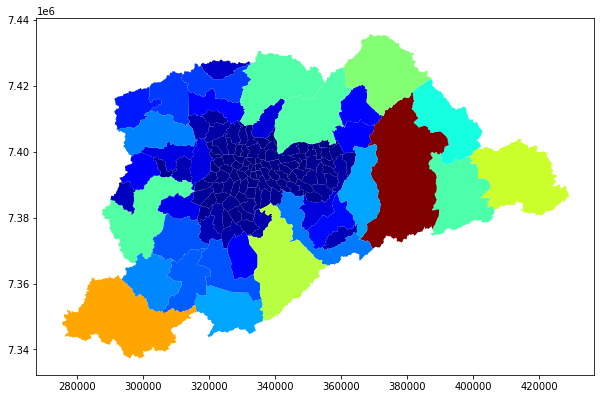

In [5]:
df_geo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/od2017/Distritos_2017_region.shp")
print(df_geo.columns)
df_geo.plot(cmap="jet", column= "Area_ha", figsize=(10,10))

<AxesSubplot:>

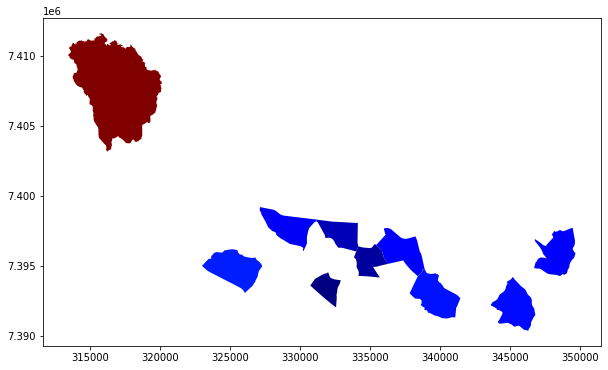

In [6]:
df_geo.head(10).plot(cmap="jet", column= "Area_ha", figsize=(10,10))

In [7]:
df_geo[(df_geo["NumeroDist"] >= 1) & (df_geo["NumeroDist"] <= 15)]

,NumeroDist,NomeDistri,Area_ha,geometry
0,1,Água Rasa,715.05,"POLYGON Z ((341424.968 7392693.358 0.000, 3414..."
1,2,Alto de Pinheiros,751.26,"POLYGON Z ((327280.093 7394982.866 0.000, 3272..."
2,3,Anhanguera,3339.95,"POLYGON Z ((320101.634 7408074.713 0.000, 3200..."
3,4,Aricanduva,686.26,"POLYGON Z ((346773.152 7391533.787 0.000, 3467..."
4,5,Artur Alvim,653.04,"POLYGON Z ((349640.523 7395895.759 0.000, 3496..."
5,6,Barra Funda,589.80,"POLYGON Z ((331161.512 7398310.426 0.000, 3311..."
6,7,Bela Vista,276.70,"POLYGON Z ((332889.897 7393969.909 0.000, 3328..."
7,8,Belém,613.55,"POLYGON Z ((338870.517 7394793.938 0.000, 3388..."
8,9,Bom Retiro,427.38,"POLYGON Z ((334123.426 7396473.201 0.000, 3341..."
9,10,Brás,364.61,"POLYGON Z ((336251.967 7395146.758 0.000, 3362..."


In [8]:
df_geo.crs

<Projected CRS: EPSG:22523>
Name: Corrego Alegre 1970-72 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - onshore between 48°W and 42°W and south of 15°S.
- bounds: (-48.0, -25.29, -42.0, -15.0)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Corrego Alegre 1970-72
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [9]:
df = pd.read_parquet("/home/yoshraf/projects/mestrado/data/processed/OD_2017.parquet")
df = df[["Identifica pessoa", "Coordenada X Origem", "Coordenada Y Origem"]]
df.sample(10)

,Identifica pessoa,Coordenada X Origem,Coordenada Y Origem
180008,05082433101,302862.0,7378388.0
35963,00850002101,329270.0,7396156.0
131043,03670016102,NaN,NaN
139548,03960068101,360561.0,7401626.0
133391,03760008102,NaN,NaN
67021,01800042102,347445.0,7402032.0
98525,02770622102,332673.0,7385328.0
33123,00801547101,328493.0,7393084.0
23338,00611200101,333012.0,7388992.0
119991,03270013105,NaN,NaN


In [10]:
gdf_origin = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df["Coordenada X Origem"], df["Coordenada Y Origem"]))

<AxesSubplot:>

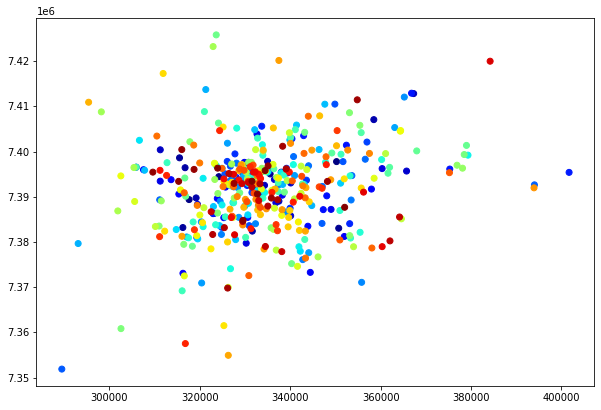

In [11]:
gdf_origin.sample(500).plot(cmap="jet", figsize=(10,10))

<AxesSubplot:>

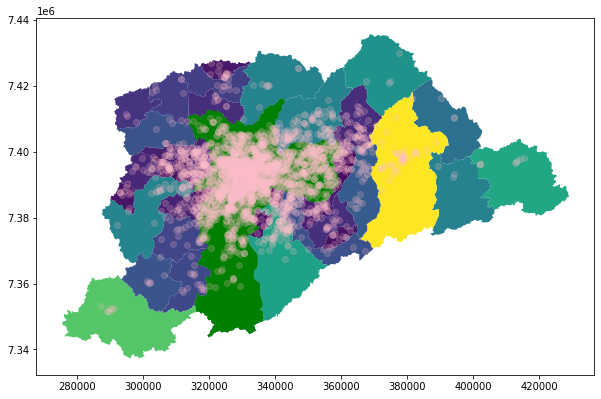

In [19]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_geo.plot(ax = ax, column= "Area_ha")
df_sp.plot(ax = ax, color="green")
gdf_origin.sample(4_000).plot(ax= ax, color="pink", alpha=.20)

In [13]:
df_ciclo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/ciclovia/sad6996_ciclovia.shp")
df_geo.head(10)

,NumeroDist,NomeDistri,Area_ha,geometry
0,1,Água Rasa,715.05,"POLYGON Z ((341424.968 7392693.358 0.000, 3414..."
1,2,Alto de Pinheiros,751.26,"POLYGON Z ((327280.093 7394982.866 0.000, 3272..."
2,3,Anhanguera,3339.95,"POLYGON Z ((320101.634 7408074.713 0.000, 3200..."
3,4,Aricanduva,686.26,"POLYGON Z ((346773.152 7391533.787 0.000, 3467..."
4,5,Artur Alvim,653.04,"POLYGON Z ((349640.523 7395895.759 0.000, 3496..."
5,6,Barra Funda,589.80,"POLYGON Z ((331161.512 7398310.426 0.000, 3311..."
6,7,Bela Vista,276.70,"POLYGON Z ((332889.897 7393969.909 0.000, 3328..."
7,8,Belém,613.55,"POLYGON Z ((338870.517 7394793.938 0.000, 3388..."
8,9,Bom Retiro,427.38,"POLYGON Z ((334123.426 7396473.201 0.000, 3341..."
9,10,Brás,364.61,"POLYGON Z ((336251.967 7395146.758 0.000, 3362..."


<AxesSubplot:>

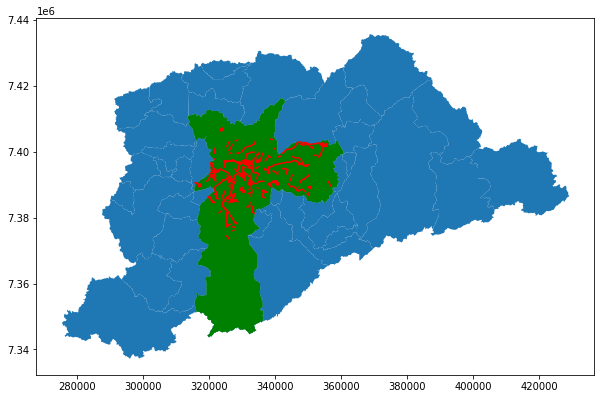

In [32]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_geo.plot(ax = ax)
df_ciclo.plot(ax= ax, color="red")
df_sp.plot(ax = ax, color="green")

In [33]:
df_ref = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/Ref SP/DEINFO_REFERENCIA_URBANA_2013.shp")
df_ref.head(10)

,ID,AREA,NOME,DEPTO,DATA,BASE,geometry
0,1,270.026855,MASP,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((330991.258 7393407.594, 331009.008 7..."
1,2,880.671875,Hospital das Clínicas,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((329838.083 7393793.052, 329833.656 7..."
2,5,304.859375,Estádio do Pacaembu,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((329979.177 7394909.662, 329981.830 7..."
3,6,344.207031,Estação da Luz,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((332967.412 7396396.821, 332968.420 7..."
4,7,632.736328,Pinacoteca do Estado de SP,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((333233.075 7396481.363, 333294.633 7..."
5,8,147.007813,Estação Júlio Prestes,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((332501.216 7396694.627, 332504.646 7..."
6,9,203.934082,Sala São Paulo,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((332714.819 7396455.738, 332728.815 7..."
7,93,174.436768,Prefeitura,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((332906.786 7394980.593, 332925.011 7..."
8,94,391.500000,Aeroporto Campo de Marte,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((332450.440 7399376.375, 332499.906 7..."
9,12,530.889648,Faculdade de Direito da USP,SMDU_DEINFO,08/08/2013,LOTE_MDC,"POLYGON ((332884.265 7394744.210, 332964.042 7..."


In [34]:
df_metro = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/metro/SAD69-96_SHP_estacaometro_point.shp")
df_metro

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349884.430 7395720.764)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348502.644 7395929.882)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346777.766 7396920.334)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345227.021 7397116.638)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343753.993 7396811.454)
...,...,...,...,...,...
88,METRO,OPERANDO,LILAS,CAMPO BELO,POINT (328417.735 7386993.338)
89,METRO,OPERANDO,PRATA,SÃO MATEUS,POINT (349391.936 7387987.687)
90,METRO,OPERANDO,PRATA,FAZENDA DA JUTA,POINT (348290.533 7388020.493)
91,METRO,OPERANDO,PRATA,SAPOPEMBA,POINT (346870.129 7387666.243)


<AxesSubplot:>

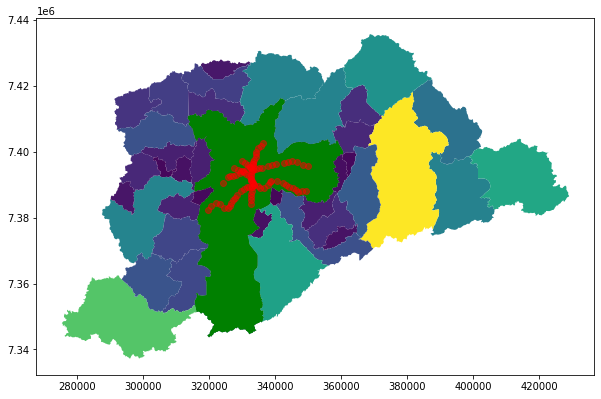

In [35]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_geo.plot(ax = ax, column= "Area_ha")
df_sp.plot(ax = ax, color="green")
df_metro.plot(ax = ax, alpha = 0.5, color = "red")

In [36]:
df_trem = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/trem/SAD69-96_SHP_estacaotrem_point.shp")
df_trem

,etr_situac,etr_linha,etr_nome,etr_empres,geometry
0,OPERANDO,DIAMANTE,PARADA AMADOR BUENO,CPTM,POINT (297522.217 7396396.783)
1,OPERANDO,RUBI,JUNDIAÍ,CPTM,POINT (308423.908 7433686.434)
2,OPERANDO,ESMERALDA,PRIMAVERA-INTERLAGOS,CPTM,POINT (327590.722 7375493.782)
3,OPERANDO,ESMERALDA,GRAJAÚ,CPTM,POINT (327072.935 7373966.185)
4,OPERANDO,TURQUESA,PREFEITO CELSO DANIEL-SANTO ANDRÉ,CPTM,POINT (344172.907 7383503.783)
...,...,...,...,...,...
98,OPERANDO,ESMERALDA,OSASCO,CPTM,POINT (318753.652 7396981.513)
99,OPERANDO,CORAL,LUZ,CPTM,POINT (333110.227 7396328.208)
100,OPERANDO,JADE,ENGENHEIRO GOULART,CPTM,POINT (344824.976 7400569.968)
101,OPERANDO,SAFIRA,CALMON VIANA,CPTM,POINT (364028.268 7397713.574)


<AxesSubplot:>

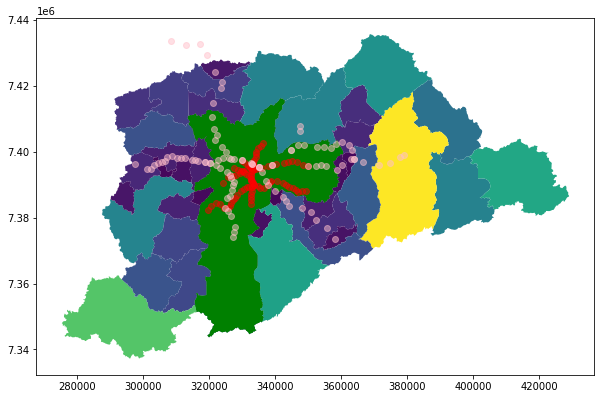

In [39]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_geo.plot(ax = ax, column= "Area_ha")
df_sp.plot(ax = ax, color="green")
df_metro.plot(ax = ax, alpha = 0.5, color = "red")
df_trem.plot(ax = ax, alpha = 0.5, color = "pink")

In [40]:
df_relevo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/declividade/sirgas_declividade.shp")
df_relevo

,ID,AREA,CLASSE,CODIGO,geometry
0,4564,0.020051,05 a 25%,2,"POLYGON ((330092.626 7408502.023, 330292.635 7..."
1,5707,36.261402,05 a 25%,2,"POLYGON ((329592.665 7401001.994, 329592.702 7..."
2,7048,201.025467,0 a 05%,1,"POLYGON ((329592.675 7399901.984, 329792.669 7..."
3,9774,1.494003,25 a 60%,3,"POLYGON ((358792.774 7390501.947, 358892.692 7..."
4,10088,0.020059,05 a 25%,2,"POLYGON ((358892.726 7390001.923, 358892.678 7..."
...,...,...,...,...,...
24632,7211,0.010026,05 a 25%,2,"POLYGON ((358792.774 7401701.965, 358792.731 7..."
24633,7413,0.010023,0 a 05%,1,"POLYGON ((360092.695 7401101.919, 359992.705 7..."
24634,7383,0.010031,0 a 05%,1,"POLYGON ((359992.772 7401201.960, 359892.680 7..."
24635,7883,0.010027,0 a 05%,1,"POLYGON ((360592.765 7399401.969, 360492.685 7..."


<AxesSubplot:>

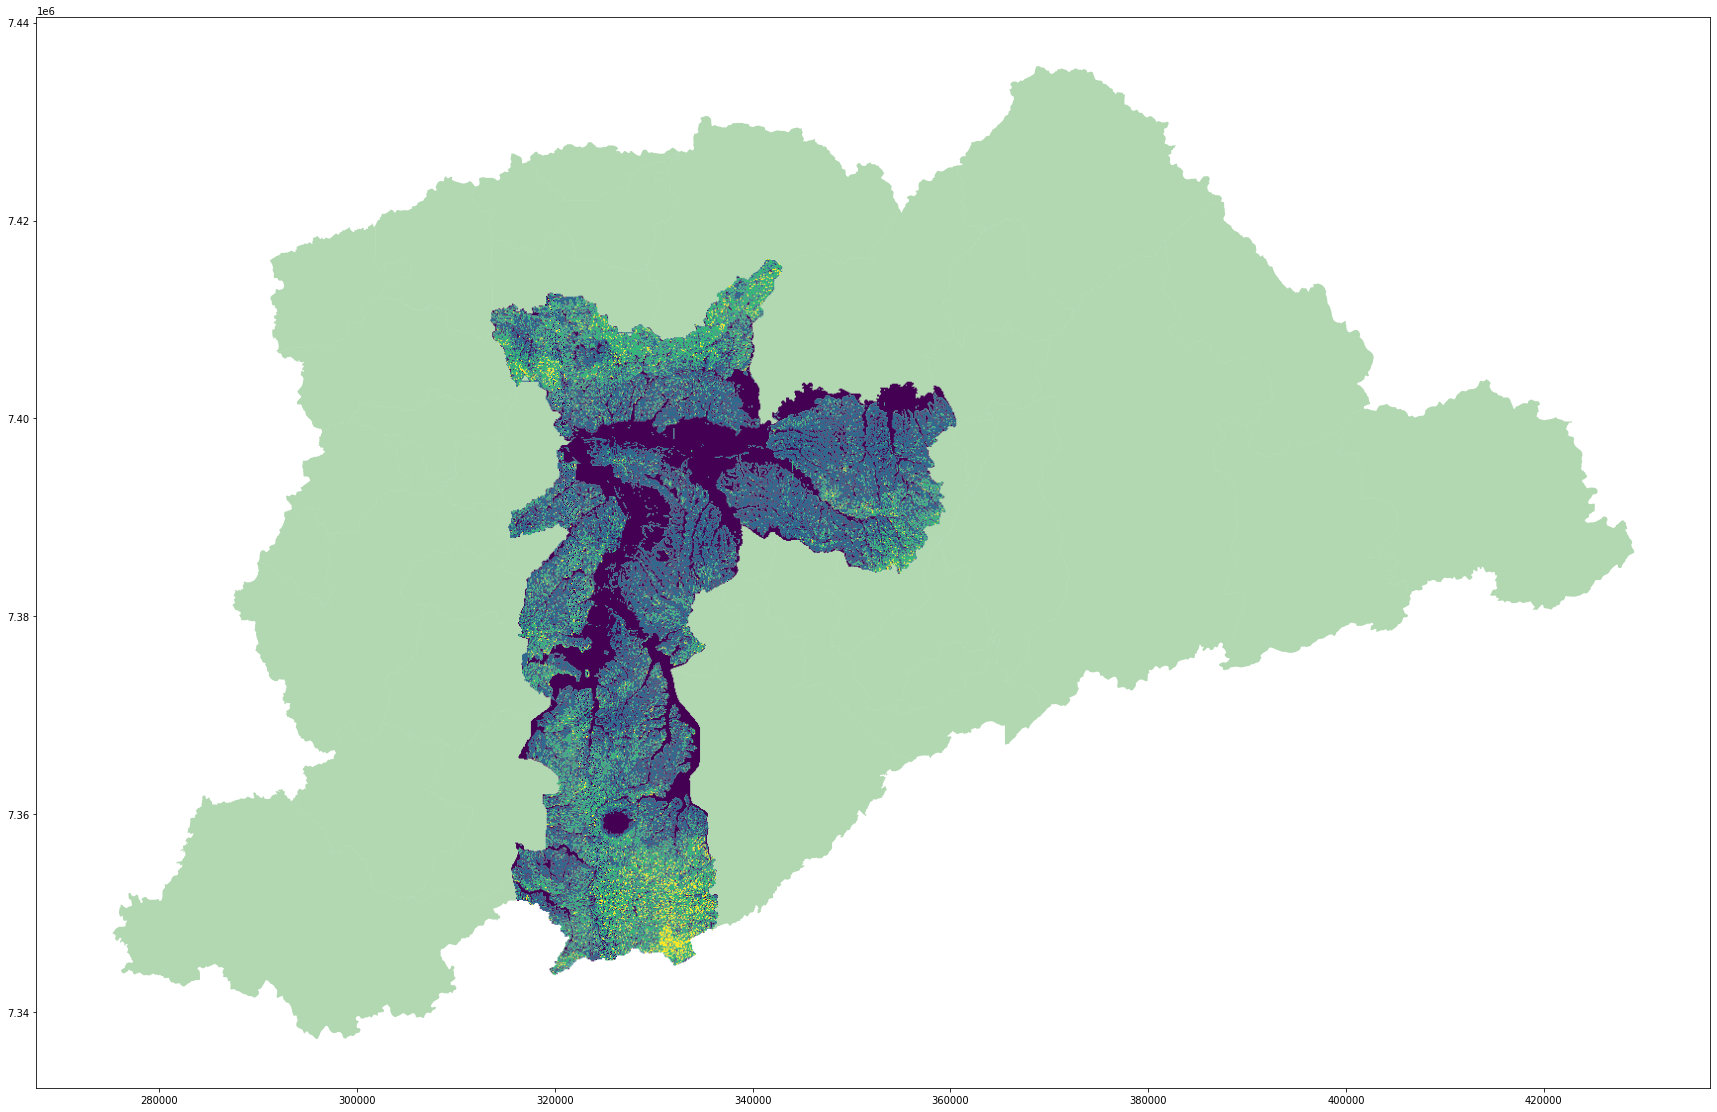

In [41]:
f = 3
fig, ax = plt.subplots(1, figsize=(10*f,10*f))
df_geo.plot(ax = ax, color = "green", alpha=.3)
df_relevo.plot(ax = ax, column= "CODIGO")

In [42]:
df_relevo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/ponto_cotado/sad6996_PONTO_COTADO_INTERVIA.shp")
df_relevo

,ALTURA,geometry
0,761.43,POINT (337912.210 7386987.080)
1,759.90,POINT (337915.180 7387012.470)
2,757.90,POINT (337960.310 7386593.440)
3,757.81,POINT (338072.370 7386720.990)
4,757.25,POINT (338161.030 7386626.060)
...,...,...
126045,732.57,POINT (331432.888 7401877.539)
126046,731.74,POINT (331403.231 7401710.601)
126047,732.55,POINT (331449.991 7401769.237)
126048,733.15,POINT (331487.895 7401735.593)


<AxesSubplot:>

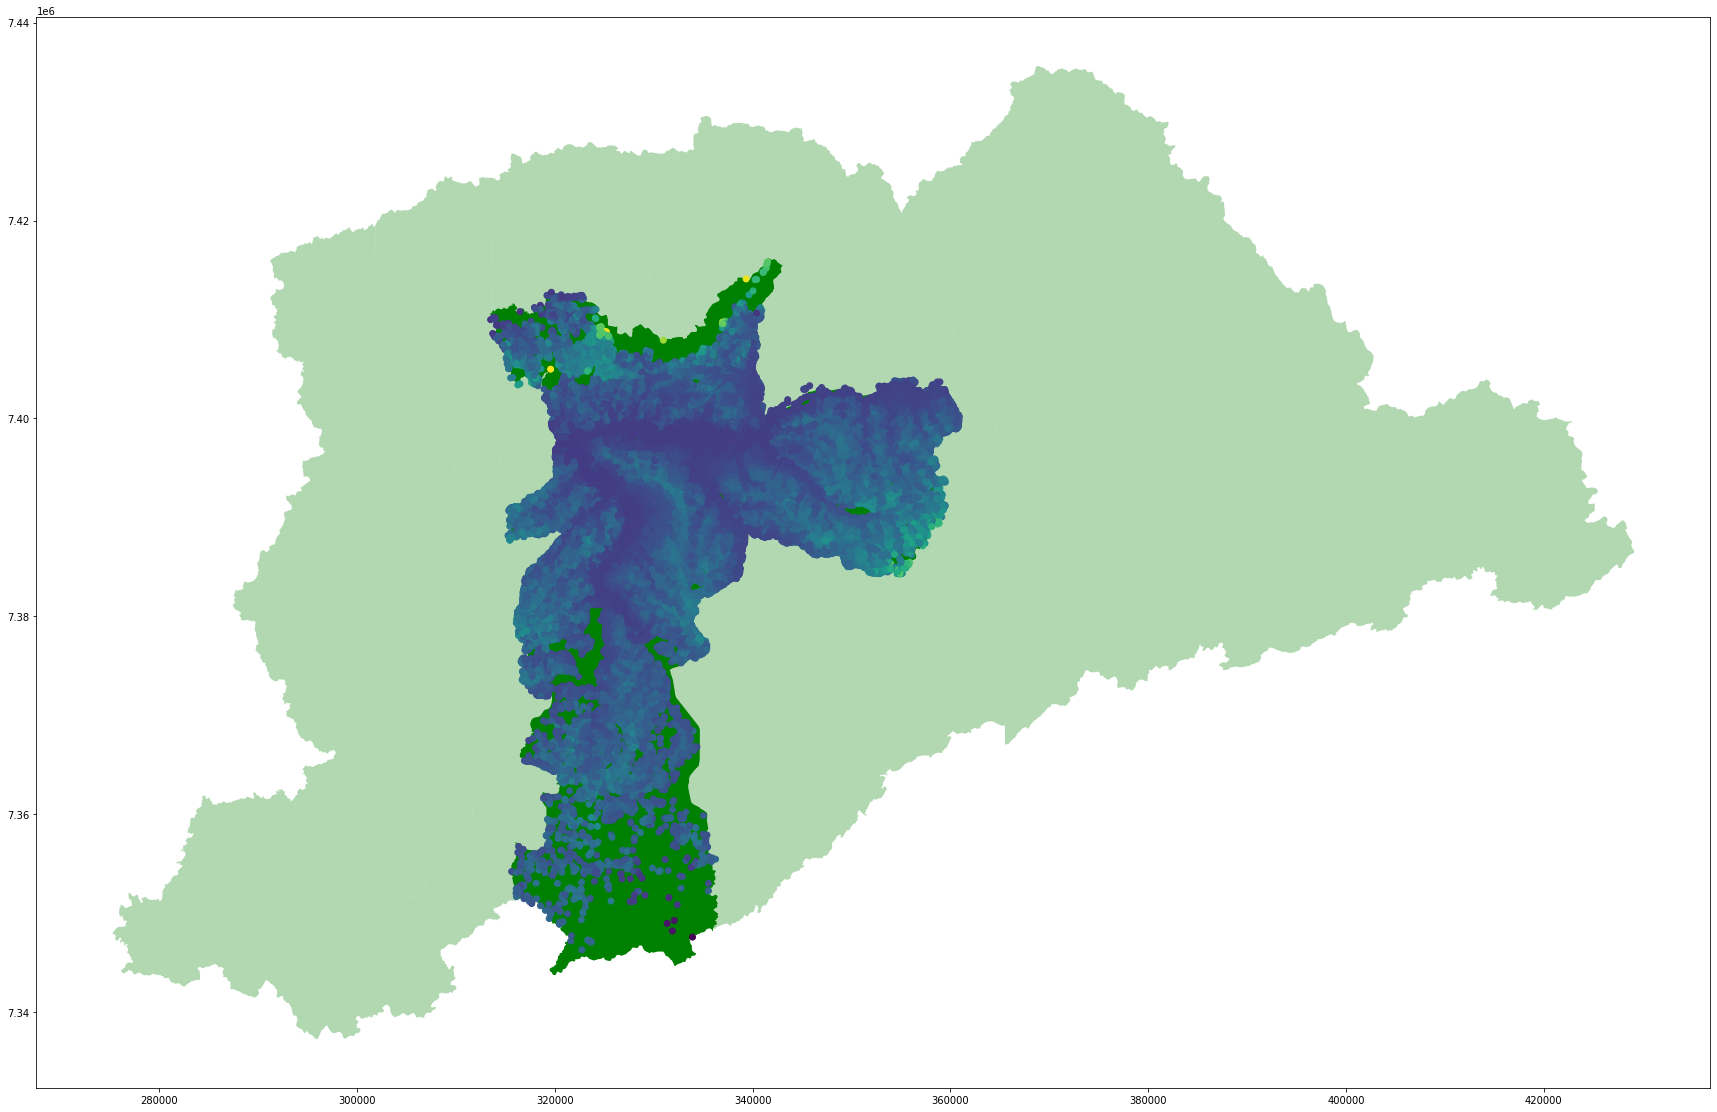

In [44]:
f = 3
fig, ax = plt.subplots(1, figsize=(10*f,10*f))
df_geo.plot(ax = ax, color = "green", alpha=.3)
df_sp.plot(ax = ax, color="green")
df_relevo.plot(ax = ax, column= "ALTURA")